In [2]:
import importlib
import Enviroment
import networkx as nx

In [3]:
importlib.reload(Enviroment)

env = Enviroment.ChordalGraphEnv()

env._reset()
print(nx.to_numpy_array(env.G))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.55407247 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.67696318 1.52483426 0.95515751 0.86806502 0.74854408
  0.57816926 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.5196308  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.90408695
  0.89820442 0.68852727 0.         0.         0.         0.54911127
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.60068356 0.         0.         0.         0.         0.
  0.69375971 0.69594167]
 [0.         0.         0.         0.90408695 0.         0.
  0.77399444 0.         0.         0.         0.         0.
  0.         0.65493073]
 [0.         0.         0.         0.89820442 0.60068356 0.77399444
  0.         0.         0.81220598 0. 

In [4]:
import networkx as nx
import itertools

def find_maximal_cliques(G):
    """Find all maximal cliques in the graph."""
    return list(nx.find_cliques(G))

def create_clique_graph(G):
    """Create a clique graph from the input graph."""
    # Find all maximal cliques
    cliques = find_maximal_cliques(G)
    
    # Create a new graph where nodes are cliques
    clique_graph = nx.Graph()
    
    # Add nodes (cliques) to the graph
    for i, clique in enumerate(cliques):
        clique_graph.add_node(i, members=set(clique))
    
    # Connect cliques that have non-empty intersections
    for i, j in itertools.combinations(range(len(cliques)), 2):
        if set(cliques[i]) & set(cliques[j]):
            clique_graph.add_edge(i, j)
    
    return clique_graph

def are_graphs_isomorphic(G1, G2):
    """Check if two graphs are isomorphic."""
    return nx.is_isomorphic(G1, G2)

def find_maximal_clique_graph_fixpoint(G):
    """
    Recursively find the maximal clique graph until the graph becomes isomorphic.
    
    Args:
        G (nx.Graph): Input graph
    
    Returns:
        tuple: (Final clique graph, Number of iterations)
    """
    current_graph = G
    iteration = 0
    
    while True:
        # Create clique graph of current graph
        nx.draw(current_graph)
        clique_graph = create_clique_graph(current_graph)
        
        # Check if new clique graph is isomorphic to previous graph
        if are_graphs_isomorphic(current_graph, clique_graph):
            return clique_graph, iteration
        
        # Update current graph for next iteration
        current_graph = clique_graph
        iteration += 1

# Example usage
def main():
    # Create a sample graph
    env._reset()
    G = env.G
    
    # Find maximal clique graph fixpoint
    result_graph, iterations = find_maximal_clique_graph_fixpoint(G)
    
    print(f"Iterations to reach fixpoint: {iterations}")
    print("Final clique graph nodes:", result_graph.nodes())
    print("Final clique graph edges:", result_graph.edges())


In [5]:
env.get_state()

In [30]:
env.valid_clique_merges()

[((0, 2, 5, 6), (0, 3, 6)), ((0, 3, 6), (3, 9))]

In [7]:

import Enviroment
import Agents
import Playground

In [8]:
importlib.reload(Enviroment)
importlib.reload(Agents)
importlib.reload(Playground)

agent = Agents.KNNGraphAgent()
env = Enviroment.ChordalGraphEnv()
playground = Playground.ChordalPlayground(agent, env)
playground.train(num_episodes=10)

c:\Users\abhik\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\abhik\Anaconda\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


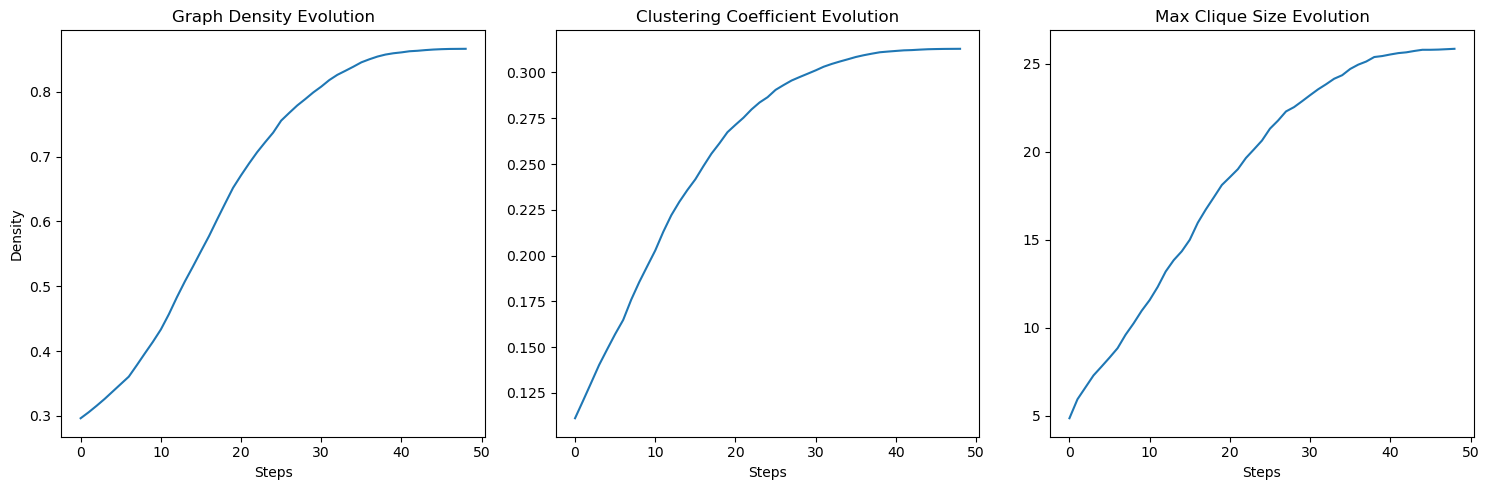

{'avg_evolution': {'density': array([0.29638156, 0.30563591, 0.31570864, 0.3262958 , 0.33770651,
         0.34912478, 0.36051353, 0.3781804 , 0.39635567, 0.4141593 ,
         0.43329333, 0.45685172, 0.48305614, 0.50753841, 0.53040982,
         0.55401764, 0.57724381, 0.60261713, 0.62737975, 0.65177793,
         0.67113983, 0.68943531, 0.70671814, 0.72211095, 0.73692562,
         0.75547035, 0.76731214, 0.77878008, 0.78861564, 0.79890376,
         0.80791653, 0.81798998, 0.82603975, 0.83224998, 0.83861707,
         0.84535364, 0.85005137, 0.85421605, 0.8573138 , 0.85933489,
         0.86069954, 0.86242356, 0.86316168, 0.8642308 , 0.86507241,
         0.86563477, 0.86598268, 0.86608727, 0.8661943 ]),
  'clustering': array([0.11114062, 0.12071083, 0.13042694, 0.14024635, 0.14874876,
         0.15710352, 0.16483205, 0.17587989, 0.1854815 , 0.19417492,
         0.20278609, 0.2129689 , 0.22202643, 0.22933674, 0.23576661,
         0.24166441, 0.24881596, 0.25562558, 0.26129907, 0.26738021,
  

In [101]:
playground.analyze_state_transitions()